## **Simulation of compound interest of portfolio by consistently investing**
---
Conditions:
*   constantly monthly investment - 200$
*   constant APY - 5%
*   Period - 20 years

### 1. Libraries

In [1]:
#Import the libraries
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#Create a variable for your monthly deposits
monthly_saving = 200 #monthly payment 200USD
#Create a variable to store the intrest rate
rate = 0.05 # 5% Annual Percentage Yield APY
#Create a variable to store the time or number of time periods elapsed
time = 1/12
#Create a variable to store the number of times the intrest is applied per time period
num_compounded = 12
#Create a variable to store the number of months invested
num_months_saving = 240 #12 moths * 20 years = 240

### 2. Compound formula

In [3]:
#Create a function to mimic the compound formula
# https://www.calculatorsoup.com/calculators/financial/compound-interest-calculator.php
def compound_intrest(P, r, t, n):
  #Create the formula
  #A = P(1+r/n)^(tn)
  A = P * pow( (1+r/n), (t*n) )
  return A

### 3. Main function

In [5]:
#Create a function for the strategy
def investment_strategy():
  #Create empty lists to store the values
  compound_list = []
  monthly_deposit_list = []
  compound_deposit_list = []
  compound_deposit_list.append(200)

  #Add the initial deposit or the 1st moth savings to the lists
  compound_list.append(monthly_saving)
  monthly_deposit_list.append(monthly_saving)

  #Loop through the number of months -1
  for i in range(1, num_months_saving):
    Amount = compound_intrest( compound_list[i-1], rate, time, num_compounded)
    compound_list.append( Amount + monthly_saving)
    monthly_deposit_list.append(monthly_saving)
    compound_deposit_list.append(monthly_saving + compound_deposit_list[i-1])

  return (compound_list, monthly_deposit_list, compound_deposit_list)

In [20]:
#Get and store the compound list
compound_list = investment_strategy()[0]

In [10]:
#Get and store the total compound deposit list
compound_deposit_list = investment_strategy()[2]

In [22]:
#Data Frame for compound investments and deposits 
data = {'Compound':compound_list, 'Deposit':compound_deposit_list}
df = pd.DataFrame(data)
#df=pd.DataFrame(compound_list, compound_deposit_list)
#df['Date'] = df.index
df.head()

,Compound,Deposit
0,200.000000,200
1,400.833333,400
2,602.503472,600
3,805.013903,800
4,1008.368128,1000


In [23]:
#Show the total return after "n" years on my investment
total_return = compound_list[num_months_saving - 1]
total_return

82206.73370313575

In [24]:
#Get the list of monthly deposits
monthly_deposit_list = investment_strategy()[1]

#Get the total deposit amount
total_deposit = len(monthly_deposit_list) * monthly_saving
total_deposit

48000

### 4. Plot of relationship between return and deposit of investment

<module 'matplotlib.pyplot' from 'D:\\Programowanie\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

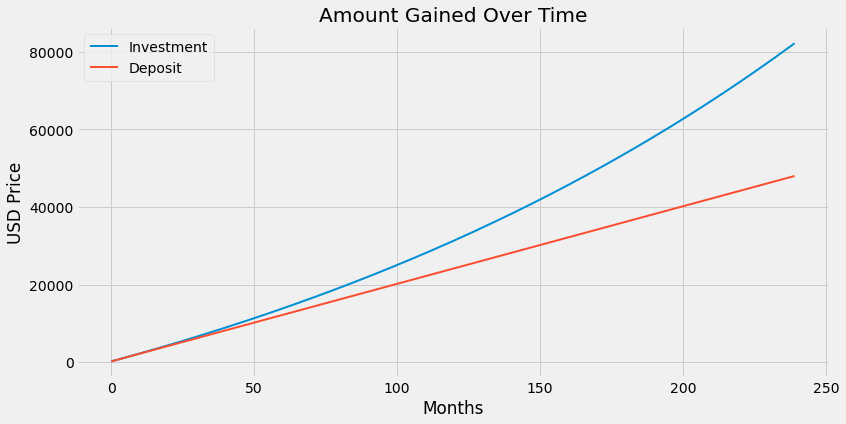

In [29]:
#Visually show the investments
plt.figure(figsize=(12, 6))
plt.plot(compound_list, label='Investment', linewidth=2)
plt.plot(compound_deposit_list, label='Deposit', linewidth=2)
plt.title('Amount Gained Over Time')
plt.ylabel('USD Price')
plt.xlabel('Months')
plt.legend(loc='upper left')
plt